### 히스토그램 분석
- cv2.calcHist(images, channels, mask, histSize, ranges)
- - images : 입력 이미지
- - channels : 채널 번호 , 그레이스케일 = 0, blue = 0, green = 1, red=2 ?
- - mask : 특정 영역, 사용 안하면 none
- - histSize : 히스토그램 bin 수 [256] 이면 0~255까지 1단위로 나눈 256 구간
- - ranges : 픽셀 값 범위, 밝기 값 범위 설정, [0, 256] 이면 픽셀 값 0이상 256 미만(0~255)


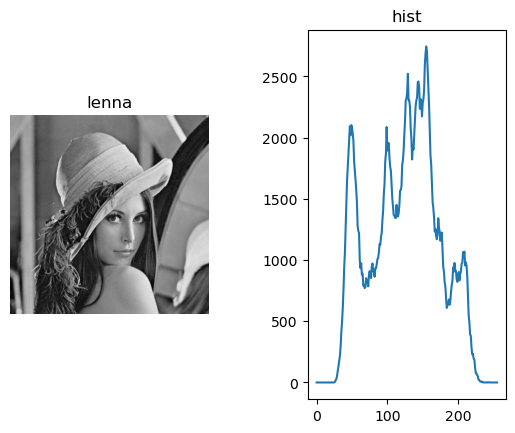

In [ ]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.subplot(121), plt.title('lenna'), plt.axis('off'), plt.imshow(src, 'gray')
plt.subplot(122), plt.title('hist'), plt.plot(hist)
plt.subplots_adjust(wspace=0.5) # 두 그래프 사이 간격 조절
plt.show()

### 컬러 영상의 히스토그램 구하기

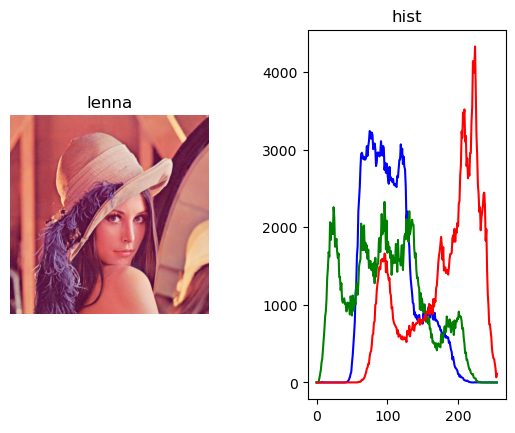

In [10]:


src = cv2.imread('lenna.bmp')

colors = ['b', 'g', 'r']
bgr_planes = cv2.split(src)

for (p, c) in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0,256])
    plt.subplot(122), plt.title('hist'), plt.plot(hist, color=c)
    
plt.subplot(121), plt.title('lenna'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplots_adjust(wspace=0.5)
plt.show()


### OpenCV 그리기 함수로 그레이스케일 영상의 히스토그램

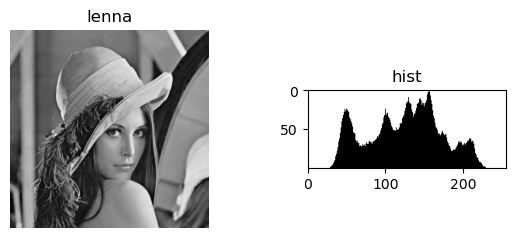

In [15]:
import numpy as np

def getGrayHistImage(hist) :
    imgHist = np.full((100, 256), 255, dtype=np.uint8)
    
    histMax = np.max(hist)
    for x in range(256) :
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x,0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)
        
    return imgHist

src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([src], [0], None, [256], [0,256])
histImg = getGrayHistImage(hist)

plt.subplot(121), plt.title('lenna'), plt.axis('off'), plt.imshow(src, 'gray')
plt.subplot(122), plt.title('hist'), plt.imshow(histImg, 'gray')
plt.subplots_adjust(wspace=0.5) # 두 그래프 사이 간격 조절
plt.show()


### 영상의 자동 명암비 조절

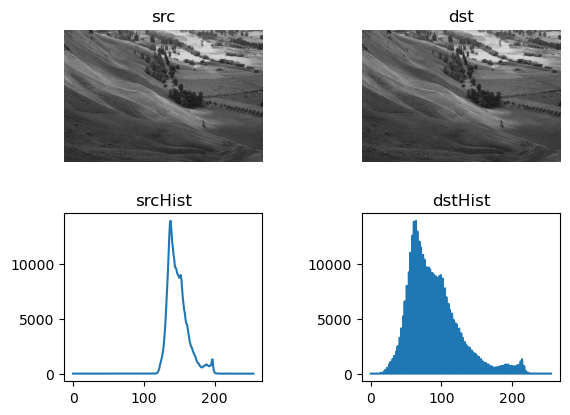

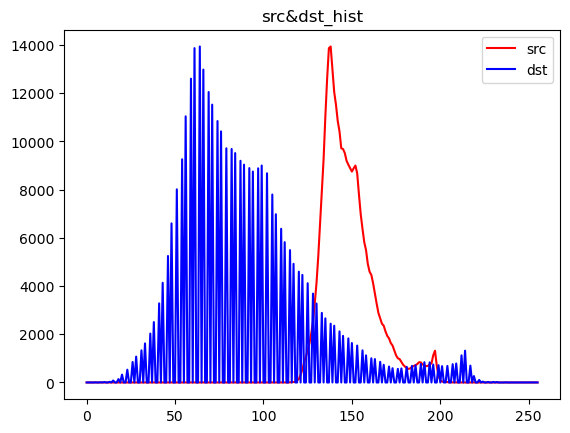

In [28]:
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

srcHist = cv2.calcHist([src], [0], None, [256], [0,256])
dstHist = cv2.calcHist([dst], [0], None, [256], [0,256])

plt.subplot(221), plt.title('src'), plt.axis('off'), plt.imshow(src, 'gray')
plt.subplot(222), plt.title('dst'), plt.axis('off'), plt.imshow(dst, 'gray')
plt.subplot(223), plt.title('srcHist'), plt.plot(srcHist)
plt.subplot(224), plt.title('dstHist'), plt.plot(dstHist)
plt.subplots_adjust(wspace=0.5)
plt.show()

plt.plot(srcHist, 'r', label='src')
plt.plot(dstHist, 'b', label='dst')
plt.title('src&dst_hist')
plt.legend(loc='upper right')
plt.show()





### 히스토그램 평활화

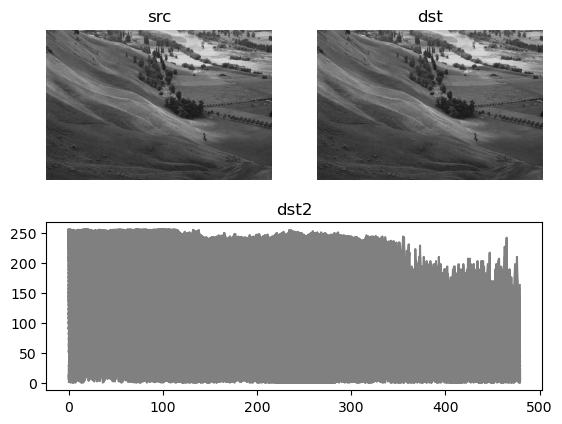

In [21]:
src = cv2.imread('Hawkes.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

dst2 = cv2.equalizeHist(src)

plt.subplot(221), plt.title('src'), plt.axis('off'), plt.imshow(src, 'gray')
plt.subplot(222), plt.title('dst'), plt.axis('off'), plt.imshow(dst, 'gray')
plt.subplot2grid((2,2), (1,0), colspan=2), plt.title('dst2'), plt.plot(dst2, 'gray')
plt.show()

### 컬러 영상의 히스토그램 평활화

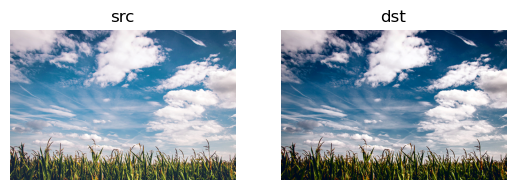

In [49]:


src = cv2.imread('field.bmp')
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# 0 : Y,, 1 : Cr, 0 : Cb
src_ycrcb[:, :, 0] = cv2.equalizeHist(src_ycrcb[:, :, 0])

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 특정 색상 영역 추출

In [ ]:


src = cv2.imread('candies.png')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# pos = 현재 바뀐 트랙바의 값, 자동으로 전달되고 opencv내부에서 자동으로 값을 받음 그래서 매개변수 인자로 받지만 함수내에서 사용안해도됨
# 안쓴다고 pos안받으면 argument가 없다고 에러뜸 안쓰는게 아니라 알아서 쓰는거임
def on_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'dst')
    hmax = cv2.getTrackbarPos('H_max', 'dst')
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)    

cv2.imshow('src', src)
cv2.namedWindow('dst')

cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)
cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)
on_trackbar(0)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


### [실전 코딩] 크로마 키 합성

In [ ]:
# 카툰 필터 카메라

import sys
import numpy as np
import cv2


def cartoon_filter(img):
    h, w = img.shape[:2]
    img2 = cv2.resize(img, (w//2, h//2))

    blr = cv2.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv2.Canny(img2, 80, 120)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)

    return dst


def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 3)
    dst = cv2.divide(gray, blr, scale=255)
    return dst


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed!')
    sys.exit()

cam_mode = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    if cam_mode == 1:
        frame = cartoon_filter(frame)
    elif cam_mode == 2:
        frame = pencil_sketch(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == ord(' '):
        cam_mode += 1
        if cam_mode == 3:
            cam_mode = 0


cap.release()
cv2.destroyAllWindows()


In [58]:
import sys
import numpy as np
import cv2


# 녹색 배경 동영상
cap1 = cv2.VideoCapture('woman.mp4')

if not cap1.isOpened():
    print('video open failed!')
    sys.exit()

# 비오는 배경 동영상
cap2 = cv2.VideoCapture('raining.mp4')

if not cap2.isOpened():
    print('video open failed!')
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 합성 여부 플래그
do_composit = False

# 전체 동영상 재생
while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break
    
    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (70, 255, 255))
        cv2.copyTo(frame2, mask, frame1)

    cv2.imshow('frame', frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(' '):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()


frame_cnt1: 409
frame_cnt2: 353


### 필터링 이해하기

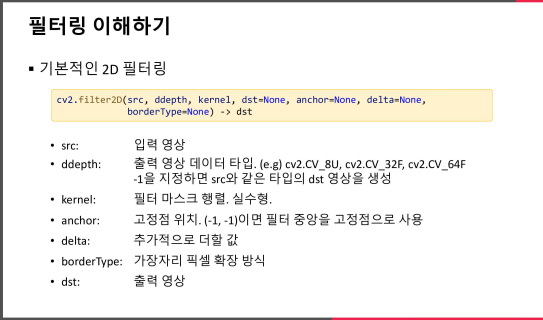

### 블러링1 : 평균 값 필터

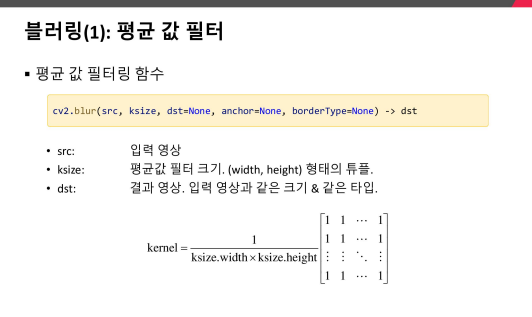

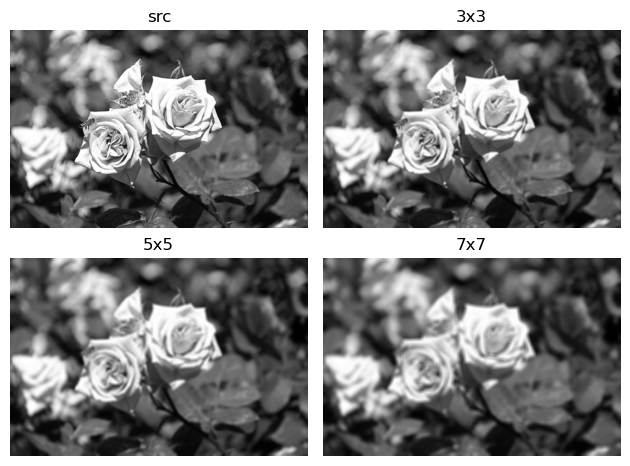

In [64]:

src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

# cv2.imshow('src', src)

ksizes = [3,5,7]

for idx, ksize in enumerate(ksizes):
    dst = cv2.blur(src, (ksize, ksize))
    
    # desc = 'Mean: {}x{}'.format(ksize, ksize)
    # cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
    #             1.0, 255, 1, cv2.LINE_AA)
    plt.subplot(2,2, idx+2)
    plt.title(f'{ksize}x{ksize}')
    plt.axis('off')
    plt.imshow(dst, 'gray')
    
    
#     cv2.imshow('dst', dst)
#     cv2.waitKey()
    
# cv2.destroyAllWindows()


plt.subplot(221), plt.title('src'), plt.axis('off'), plt.imshow(src, 'gray')
plt.tight_layout()
plt.show()

### 블러링2 : 가우시안 필터

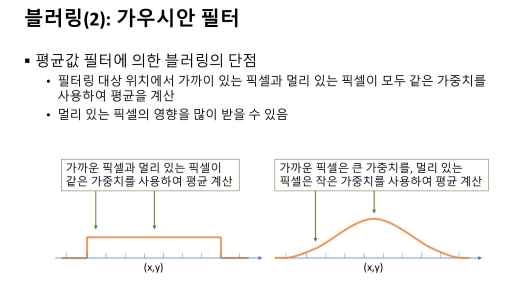

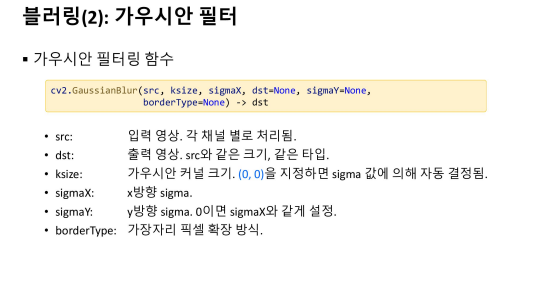

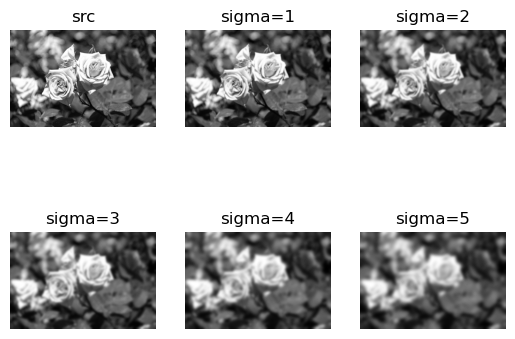

In [71]:

src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

# cv2.imshow('src', src)
idx=1
for sigma in range(1, 6):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)
    
#     desc = 'sigma = {}'.format(sigma)
#     cv2.putText(dst, desc, (10,30), cv2.FONT_HERSHEY_SIMPLEX,
#                 1.0, 255, 1, cv2.LINE_AA)
    
#     cv2.imshow('dst', dst)
#     cv2.waitKey()
    
    plt.subplot(2,3,idx + 1)
    plt.title(f'sigma={sigma}')
    plt.axis('off')
    plt.imshow(dst, 'gray')
    idx+=1
    
    
# cv2.destroyAllWindows()
plt.subplot(231), plt.title('src'), plt.axis('off'), plt.imshow(src, 'gray')
plt.tight_layout
plt.show()

### 샤프닝 : 언샤프 마스크 필터

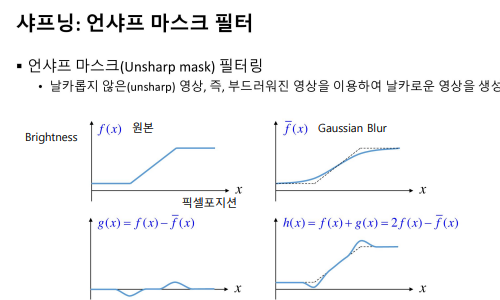

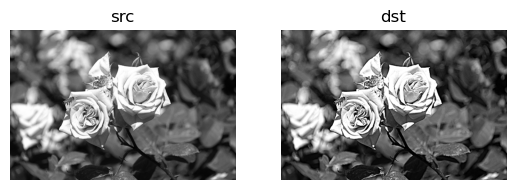

In [72]:

src = cv2.imread('rose.bmp', cv2.IMREAD_GRAYSCALE)

src_f = src.astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0,0), 2.0)
dst = np.clip(2. * src_f - blr, 0, 255).astype(np.uint8)

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(src, 'gray')
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(dst, 'gray')
plt.show()

### 컬러 영상에 대한 언샤프 마스크 필터

(<Axes: title={'center': 'dst'}>,
 Text(0.5, 1.0, 'dst'),
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x1a9ea36e5d0>)

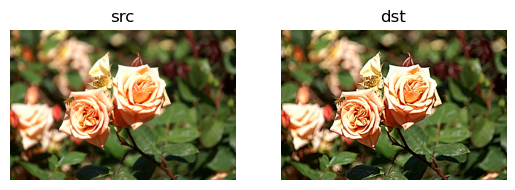

In [75]:

src = cv2.imread('rose.bmp')

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# Ycrcb 중 Y채널만
src_f = src_ycrcb[:,:,0].astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0,0), 2.0)
src_ycrcb[:,:,0] = np.clip(2. * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### 잡음 제거1 : 미디언 필터

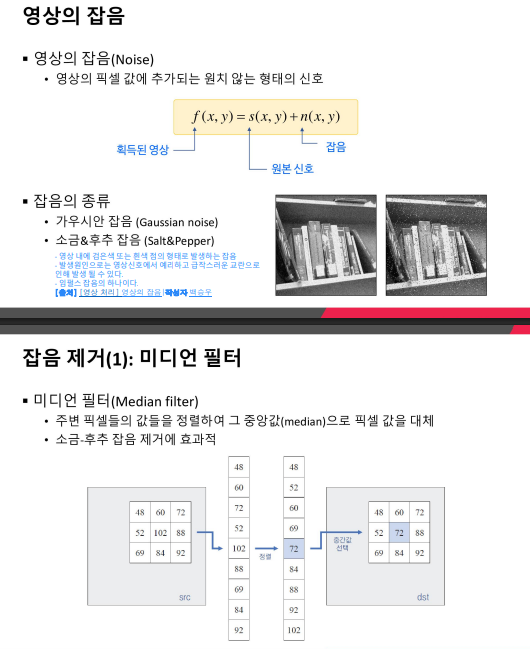

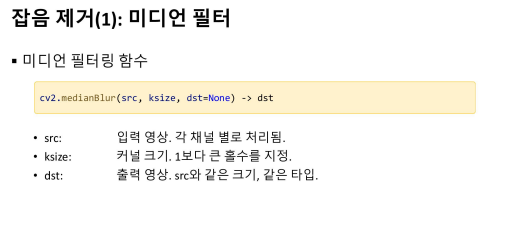

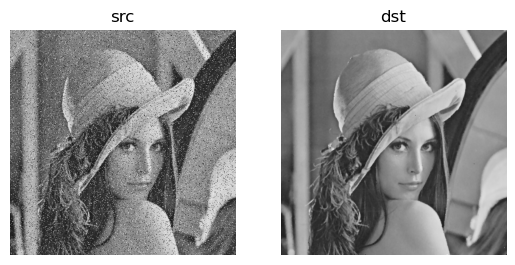

In [76]:

src = cv2.imread('noise.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.medianBlur(src, 3)

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

- 가우시안 잡음 = 가우시안 필터가 효과적
- 소금,후추 잡음 = 미디언 필터가 효과적

### 잡읍 제거2 : 양방향 필터

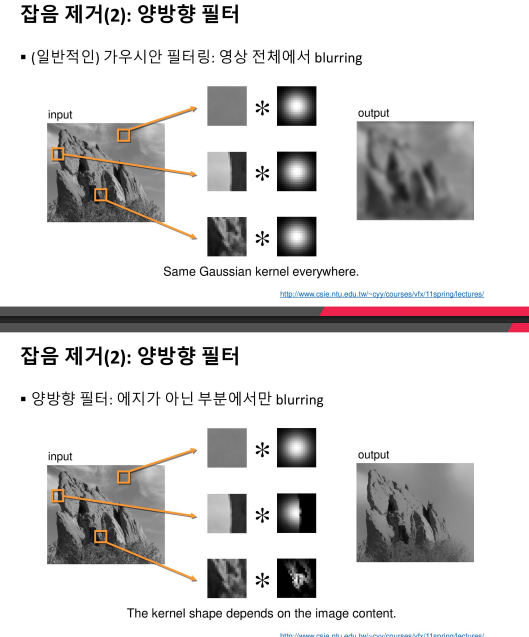

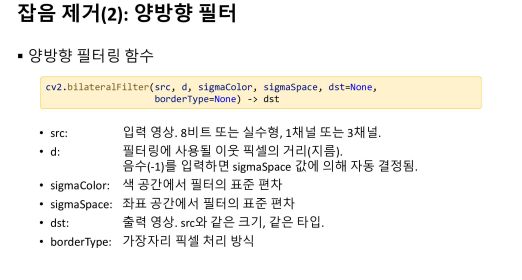

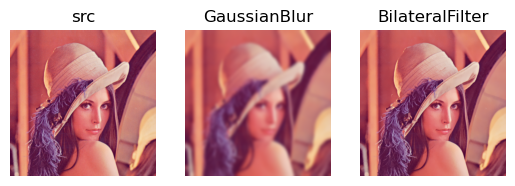

In [77]:

src = cv2.imread('lenna.bmp')

dst1 = cv2.GaussianBlur(src, (0,0), 5) # 이미지 주고 알아서 계산하라고 주고 시그마값은 5를 줌
dst2 = cv2.bilateralFilter(src, -1, 10, 5)

plt.subplot(131), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(132), plt.title('GaussianBlur'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
plt.subplot(133), plt.title('BilateralFilter'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.show()

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업


### 영상의 이동 변환
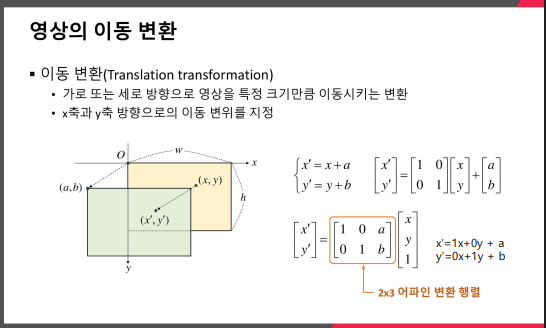

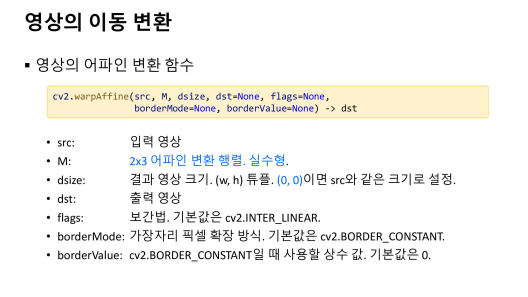

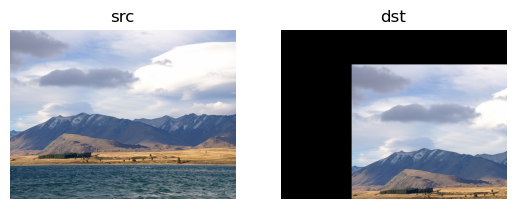

In [83]:

src = cv2.imread('tekapo.bmp')

aff = np.array([[1,0,200],
                [0,1,100]], dtype=np.float32) # 실수타입이 아니면 에러

dst = cv2.warpAffine(src, aff, (0,0))

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 영상의 전단 변환

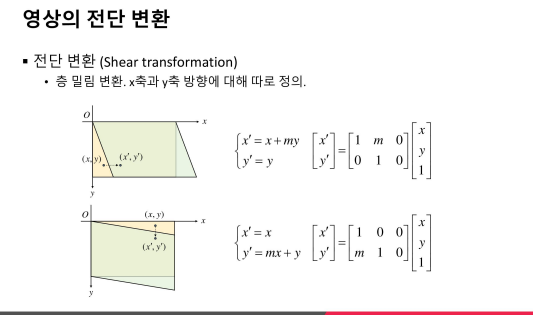

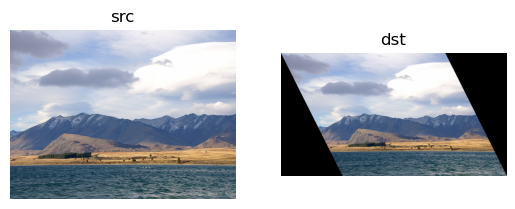

In [84]:

src = cv2.imread('tekapo.bmp')

aff = np.array([[1,0.5,0], [0,1,0]], dtype=np.float32)

h, w = src.shape[:2]
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h))


plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 영상의 크기 변환

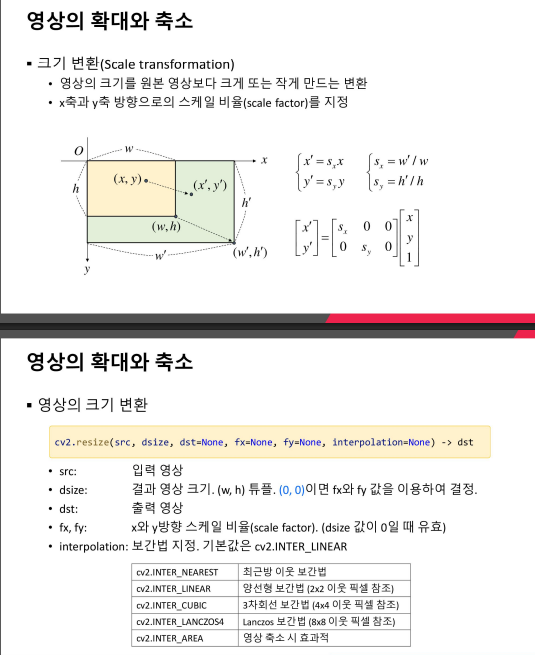

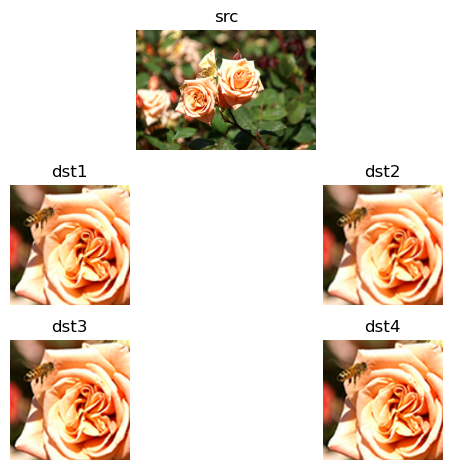

In [99]:

src = cv2.imread('rose.bmp') # 480x320

dst1 = cv2.resize(src, (0,0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280)) # cv2.INTER_LINEAR
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)


plt.subplot2grid((3,2),(0,0),colspan=2), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(323), plt.title('dst1'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst1[500:900, 400:800], cv2.COLOR_BGR2RGB))
plt.subplot(324), plt.title('dst2'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst2[500:900, 400:800], cv2.COLOR_BGR2RGB))
plt.subplot(325), plt.title('dst3'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst3[500:900, 400:800], cv2.COLOR_BGR2RGB))
plt.subplot(326), plt.title('dst4'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst4[500:900, 400:800], cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()

# cv2.imshow('src', src)
# cv2.imshow('dst1', dst1[500:900, 400:800])
# cv2.imshow('dst2', dst2[500:900, 400:800])
# cv2.imshow('dst3', dst3[500:900, 400:800])
# cv2.imshow('dst4', dst4[500:900, 400:800])
# cv2.waitKey()
# cv2.destroyWindow()

### 영상의 대칭
- 영상의 대칭 변환(flip, reflection)

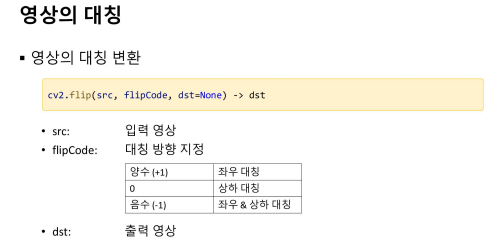

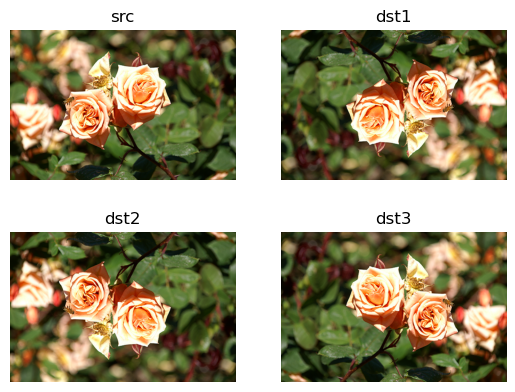

In [ ]:


src = cv2.imread('rose.bmp')

dst1 = cv2.flip(src, -1) # 좌우 & 상하 대칭
dst2 = cv2.flip(src, 0) # 상하 대칭
dst3 = cv2.flip(src, 1) # 좌우 대칭

plt.subplot(221), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(222), plt.title('dst1'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
plt.subplot(223), plt.title('dst2'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
plt.subplot(224), plt.title('dst3'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB))
plt.show()


### 이미지 피라미드
- 하나의 영상에 대해 다양한 해상도의 영상 세트를 구성한 것
- 보통 가우시안 블러링 & 다운샘플링 형태로 축소하여 구성

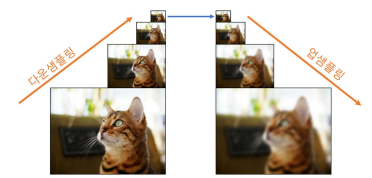


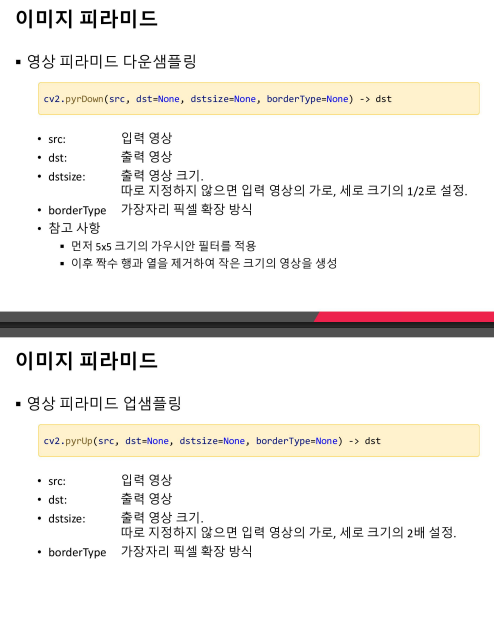



In [5]:
import cv2

src = cv2.imread('cat.bmp')

rc = (250, 120, 200, 200) # rectangle tuple

cpy = src.copy()
cv2.rectangle(cpy, rc, (0,0,255), 2)
cv2.imshow('src', cpy)
cv2.waitKey()

for i in range(1, 4):
    src = cv2.pyrDown(src)
    cpy = src.copy()
    
    # 좌표 축소
    rc_scaled = tuple([int(v / (2 ** i)) for v in rc])
    cv2.rectangle(cpy, rc_scaled, (0,0,255), 2, shift=i)
    cv2.imshow('src', cpy)
    cv2.waitKey()
    
        
cv2.destroyWindow('src')
    

### 영상의 회전

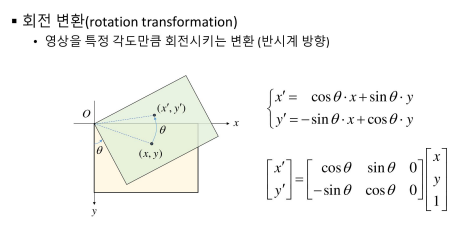

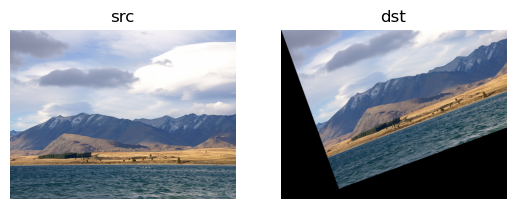

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('tekapo.bmp')

rad = 20 * math.pi/ 180
aff = np.array([[math.cos(rad), math.sin(rad), 0],
                [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0,0))

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

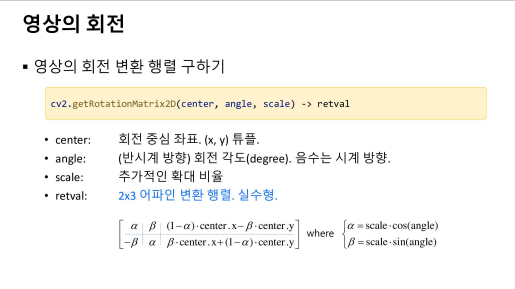

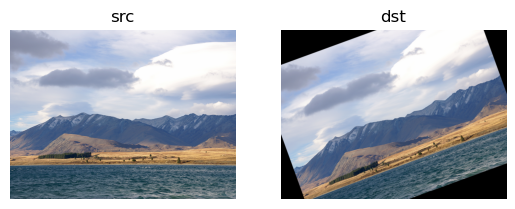

In [10]:

src = cv2.imread('tekapo.bmp')

cp = (src.shape[1] / 2, src.shape[0] / 2)
rot = cv2.getRotationMatrix2D(cp, 20, 1)

dst = cv2.warpAffine(src, rot, (0,0))

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 어파인 변환과 투시 변환

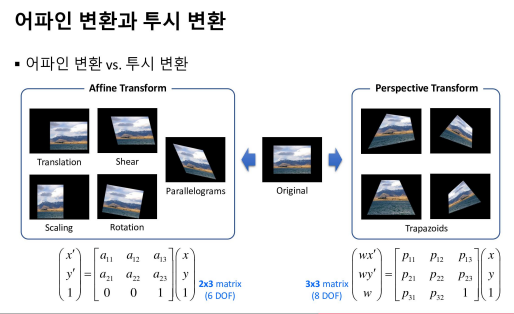
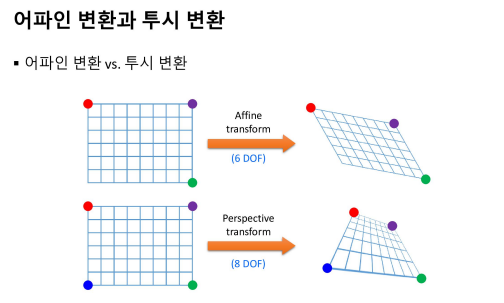

### 어파인 변환과 투시 변환 함수

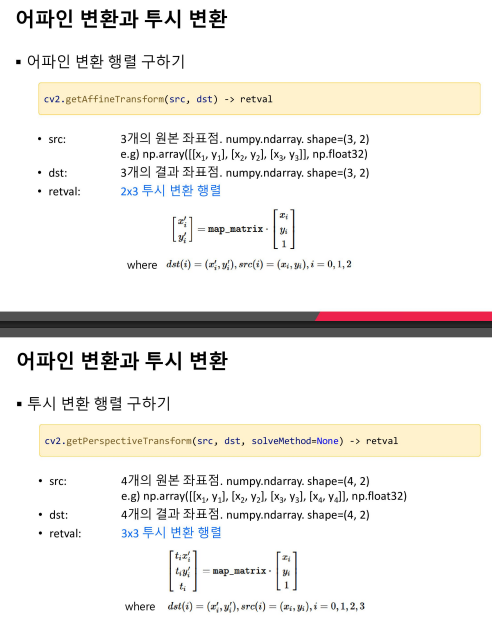

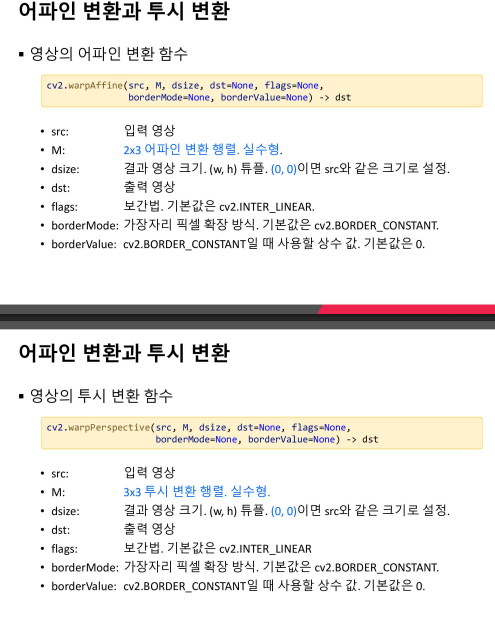

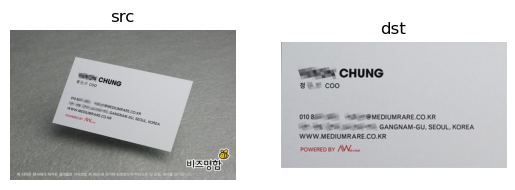

In [ ]:

src = cv2.imread('namecard.jpg')

w, h = 720, 400 # 변환된 출력 이미지의 너비와 높이

srcQuad = np.array([[222, 95],   # 좌상
                    [622, 178],  # 우상
                    [547, 416],  # 우하
                    [145, 317]], # 좌하
                   np.float32) # 변환 전 점들
dstQuad = np.array([[0,0],       # 좌상
                    [w-1, 0],    # 우상
                    [w-1, h-1],  # 우하
                    [0, h-1]],   # 좌하
                   np.float32) # 변환 후 점들

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad) # 투시 변환 행렬 계산 (srcQuad -> dstQuad로 맵핑해주는 3x3 변환 행렬 생성)
dst = cv2.warpPerspective(src, pers, (w,h)) # 변환 행렬 pers를 원본 src에 적용해서 원하는 해상도(w,h)로 변환 결과 생성

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## 리매핑

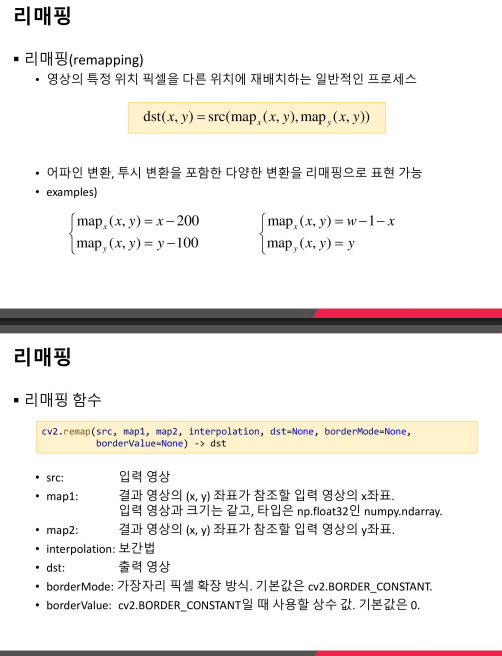

### remap() = 이미지를 픽셀 좌표 기준으로 다시 매핑하는 함수
- dst = cv2.remap(src, map1, map2, ...)
- - : map1 = x좌표 매핑, map2 = y좌표 매핑

map1 [[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]
map2 [[0.         0.31244913 0.62459314]
 [1.         1.3124491  1.6245931 ]
 [2.         2.3124492  2.6245933 ]]


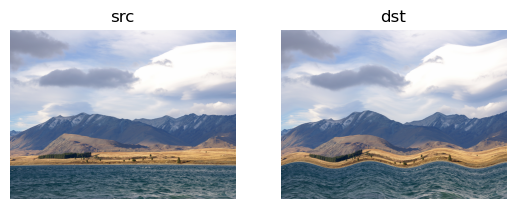

In [ ]:

src = cv2.imread('tekapo.bmp')

h, w = src.shape[:2]

map2, map1 = np.indices((h,w), np.float32)

# y 좌표에 sin 곡선을 추가해서, x축 방향으로 물결치는 y좌표 생성. 즉, 각 열마다 픽셀이 위아래로 출렁이게 변형됨
map2 = map2 + 10 * np.sin(map1 / 32)
# print('map1', map1[0:3, 0:3])
# print('map2', map2[0:3, 0:3])

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### [실전 코딩] 문서 스캐너

In [25]:
import sys
import numpy as np
import cv2


def drawROI(img, corners):
    cpy = img.copy()

    c1 = (192, 192, 255)
    c2 = (128, 128, 255)

    for pt in corners:
        cv2.circle(cpy, tuple(pt.astype(int)), 25, c1, -1, cv2.LINE_AA)

    cv2.line(cpy, tuple(corners[0].astype(int)), tuple(corners[1].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[1].astype(int)), tuple(corners[2].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[2].astype(int)), tuple(corners[3].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[3].astype(int)), tuple(corners[0].astype(int)), c2, 2, cv2.LINE_AA)

    disp = cv2.addWeighted(img, 0.3, cpy, 0.7, 0)

    return disp


def onMouse(event, x, y, flags, param):
    global srcQuad, dragSrc, ptOld, src

    if event == cv2.EVENT_LBUTTONDOWN:
        for i in range(4):
            if cv2.norm(srcQuad[i] - (x, y)) < 25:
                dragSrc[i] = True
                ptOld = (x, y)
                break

    if event == cv2.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False

    if event == cv2.EVENT_MOUSEMOVE:
        for i in range(4):
            if dragSrc[i]:
                dx = x - ptOld[0]
                dy = y - ptOld[1]

                srcQuad[i] += (dx, dy)

                cpy = drawROI(src, srcQuad)
                cv2.imshow('img', cpy)
                ptOld = (x, y)
                break


# 입력 이미지 불러오기
src = cv2.imread('Q5_scanned.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

# 입력 영상 크기 및 출력 영상 크기
h, w = src.shape[:2]
dw = 500
dh = round(dw * 297 / 210)  # A4 용지 크기: 210x297cm

# 모서리 점들의 좌표, 드래그 상태 여부
srcQuad = np.array([[30, 30], [30, h-30], [w-30, h-30], [w-30, 30]], np.float32)
dstQuad = np.array([[0, 0], [0, dh-1], [dw-1, dh-1], [dw-1, 0]], np.float32)
dragSrc = [False, False, False, False]

# 모서리점, 사각형 그리기
disp = drawROI(src, srcQuad)

cv2.imshow('img', disp)
cv2.setMouseCallback('img', onMouse)

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER 키
        break
    elif key == 27:  # ESC 키
        cv2.destroyWindow('img')
        sys.exit()

# 투시 변환
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh), flags=cv2.INTER_CUBIC)

# 결과 영상 출력
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


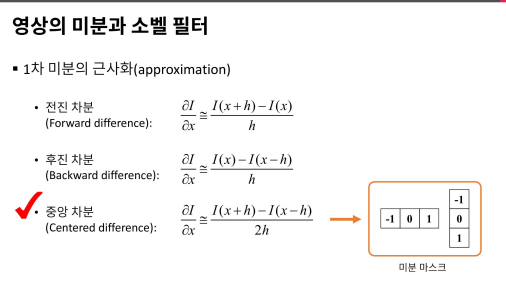

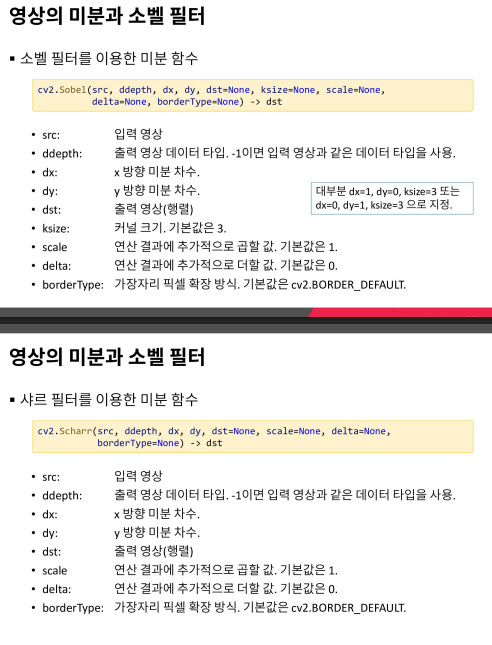

### 그래디언트 (결국 이름만 바꾼 미분임)

### 허프 변환 : 직선 검출

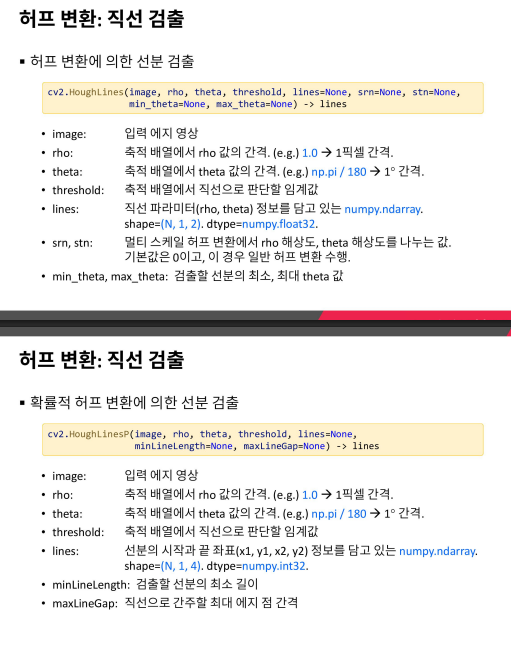

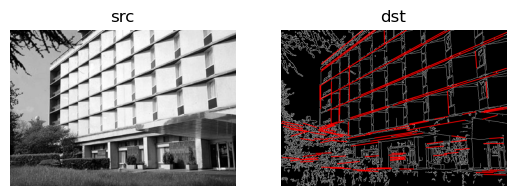

In [26]:

src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edges, 1.0, np.pi / 180., 160,
                        minLineLength=50, maxLineGap=5)

dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1]) # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3]) # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0,0,255), 2, cv2.LINE_AA)
        
plt.subplot(121), plt.title('src'), plt.axis('off'), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.title('dst'), plt.axis('off'), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 허프 변환 : 원 검출

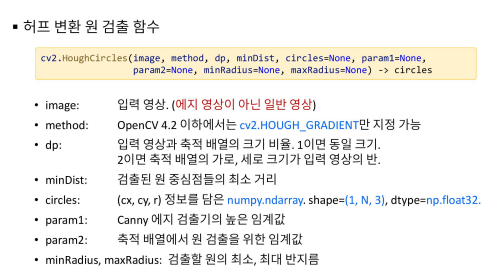

In [ ]:

src = cv2.imread('dial.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0,0), 0.5) # cv2.Hough_GRADIENT 방법 사용 시 블러링 권장

def on_trackbar(pos):
    rmin = cv2.getTrackbarPos('minRadius', 'img')
    rmax = cv2.getTrackbarPos('maxRadius', 'img')
    th = max(1, cv2.getTrackbarPos('threshold', 'img')) # th를 최소 1로 보정, 안하면 실행은 되는데 에러가 나옴.
    # th = cv2.getTrackbarPos('threshold', 'img') # error : (-211:One of the arguments' values is out of range
    
    circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                               param1=120, param2=th, minRadius=rmin, maxRadius=rmax)
    
    dst = src.copy()
    if circles is not None:
        for i in range(circles.shape[1]):
            cx, cy, radius = np.uint16(circles[0][i])
            cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('img', dst)


# 트랙바 생성
cv2.imshow('img', src)
cv2.createTrackbar('minRadius', 'img', 0, 100, on_trackbar)
cv2.createTrackbar('maxRadius', 'img', 0, 150, on_trackbar)
cv2.createTrackbar('threshold', 'img', 0, 100, on_trackbar)
cv2.setTrackbarPos('minRadius', 'img', 10)
cv2.setTrackbarPos('maxRadius', 'img', 80)
cv2.setTrackbarPos('threshold', 'img', 40)
cv2.waitKey()

cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2296: error: (-211:One of the arguments' values is out of range) acc_threshold must be a positive number in function 'cv::HoughCircles'


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2296: error: (-211:One of the arguments' values is out of range) acc_threshold must be a positive number in function 'cv::HoughCircles'


### [실전 코딩] 동전 카운터

In [34]:
import sys
import numpy as np
import cv2


# 입력 이미지 불러오기
src = cv2.imread('coins1.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1)

# 허프 변환 원 검출
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)

# 원 검출 결과 및 동전 금액 출력
sum_of_money = 0
dst = src.copy()
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = np.uint16(circles[0][i])
        cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

        # 동전 영역 부분 영상 추출
        x1 = int(cx - radius)
        y1 = int(cy - radius)
        x2 = int(cx + radius)
        y2 = int(cy + radius)
        radius = int(radius)
        
        crop = dst[y1:y2, x1:x2, :]
        ch, cw = crop.shape[:2]

        # 동전 영역에 대한 ROI 마스크 영상 생성
        mask = np.zeros((ch, cw), np.uint8)
        cv2.circle(mask, (cw//2, ch//2), radius, 255, -1)

        # 동전 영역 Hue 색 성분을 +40 시프트하고, Hue 평균을 계산
        hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
        hue, _, _ = cv2.split(hsv)
        hue_shift = (hue + 40) % 180
        mean_of_hue = cv2.mean(hue_shift, mask)[0]

        # Hue 평균이 90보다 작으면 10원, 90보다 크면 100원으로 간주
        won = 100
        if mean_of_hue < 90:
            won = 10

        sum_of_money += won

        cv2.putText(crop, str(won), (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    0.75, (255, 0, 0), 2, cv2.LINE_AA)

cv2.putText(dst, str(sum_of_money) + ' won', (40, 80),
            cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()
